In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

C:\Users\safya\anaconda3\envs\cudnn-PyTorch-cuda11.8\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
train_data = datasets.MNIST(
	root = 'data',
	train = True,
	transform = ToTensor(),
	download = True
)

test_data = datasets.MNIST(
	root = 'data',
	train = False,
	transform = ToTensor(),
	download = True
)

In [3]:

from torch.utils.data import DataLoader

loaders = {
	'train': DataLoader(train_data,
				batch_size = 100,
				shuffle = True,
				num_workers = 1),

	'test': DataLoader(test_data,
				batch_size = 100,
				shuffle = True,
				num_workers = 1),
}

In [4]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
		
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x , training = self.training)
        x = self.fc2(x)
        
        return F.softmax(x)
        
        

In [5]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\ntest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')

In [6]:
for epoch in range(1, 11):
    train(epoch)
    test()

C:\Users\safya\AppData\Local\Temp\ipykernel_18740\494925681.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.302341
Train Epoch: 1 [640/60000 (1%)]	2.305850
Train Epoch: 1 [1280/60000 (2%)]	2.288766
Train Epoch: 1 [1920/60000 (3%)]	2.246717
Train Epoch: 1 [2560/60000 (4%)]	2.130934
Train Epoch: 1 [3200/60000 (5%)]	1.987884
Train Epoch: 1 [3840/60000 (6%)]	2.008696
Train Epoch: 1 [4480/60000 (7%)]	1.945257
Train Epoch: 1 [5120/60000 (9%)]	2.007202
Train Epoch: 1 [5760/60000 (10%)]	1.979034
Train Epoch: 1 [6400/60000 (11%)]	2.053041
Train Epoch: 1 [7040/60000 (12%)]	1.919022
Train Epoch: 1 [7680/60000 (13%)]	1.830629
Train Epoch: 1 [8320/60000 (14%)]	1.898026
Train Epoch: 1 [8960/60000 (15%)]	1.832336
Train Epoch: 1 [9600/60000 (16%)]	1.923368
Train Epoch: 1 [10240/60000 (17%)]	1.875357
Train Epoch: 1 [10880/60000 (18%)]	1.756279
Train Epoch: 1 [11520/60000 (19%)]	1.668495
Train Epoch: 1 [12160/60000 (20%)]	1.893396
Train Epoch: 1 [12800/60000 (21%)]	1.796635
Train Epoch: 1 [13440/60000 (22%)]	1.737609
Train Epoch: 1 [14080/60000 (23%)]	1.704667
Train Epoch: 1 [1

In [7]:
print(device)
import os
os.cpu_count() 

cuda


12

Prediction: 6


C:\Users\safya\AppData\Local\Temp\ipykernel_18740\494925681.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


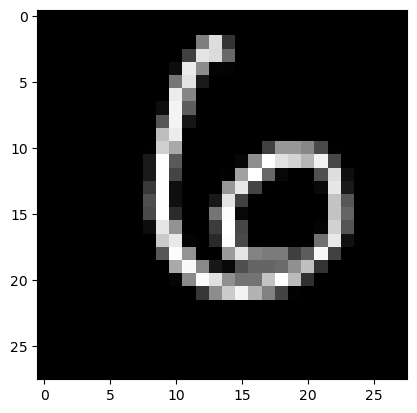

In [8]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[100]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim = 1, keepdim=True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()